# 3.6 Lab: Linear Regression


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#3.6.1-libraries">Libraries</a></li>
        <li><a href="#3.6.2-Simple-Linear-Regression">Simple Linear Regression</a></li>
        <li><a href="#3.6.3-Multiple-Linear-Regression">Multiple Linear Regression</a></li>
        <li><a href="#3.6.4-Interaction-Terms">Interaction Terms</a></li>
        <li><a href="#3.6.5-Non-linear-Transformations-of-the-Predictors">Non-linear Transformations of the Predictors</a></li>
        <li><a href="#3.6.6-Qualitative-Predictors">Qualitative Predictors</a></li>
    </ol>
</div>


The data ***Boston***, which is used for this lab work, is included with the package for R that book asks to download.
I have to download the package and extracted the data set which you can download for yourself from **[here](https://drive.google.com/file/d/1wHCEJiDFXdQ1FPUJMTtxbBK2wN4RTWyj/view?usp=sharing)**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

------------
## _3.6.2 Simple Linear Regression_
The ***Boston*** data set has ***medv*** column which is the median house value for 506 neighborhoods around Boston.

We'll attempt to predict ***medv*** using 13 predictors:

In [2]:
boston = pd.read_csv('boston.csv', index_col=0)
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


We start running linear regression using `statsmodels`

For the first regression we'll use ***medv*** as a dependent variable and ***lstat*** as a predictor

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# fitting the model using previously defined X predictor and y variable of interest
lm = ols('medv ~ lstat', data=boston).fit()

# to get the details of the regression
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        20:48:19   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that both the intercept and the ***lstat*** variable are statistically significant with *p-value* close to 0 value. However, *R-squared* is 0.544 which is not great.

we can also obtain confidence interval by using `.conf_int()` method. We also indicate the *alpha* (error) value as 5%. This means we are looking 95% confidence interval.

In [6]:
lm.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


Now we'll try to make predictions for the ***lstat*** with given values of 5, 10, 15.

In [7]:
# We first create the dataframe with lstat predicted values
pred = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])

For the predictions, we'll use the `.predict()` method.

In [8]:
lm.predict(pred)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

Next, we'll plot the graph and with a fitted line. For the one, we'll use `seaborn` libraries.

Text(0.5, 1.0, 'Linear Regression Model')

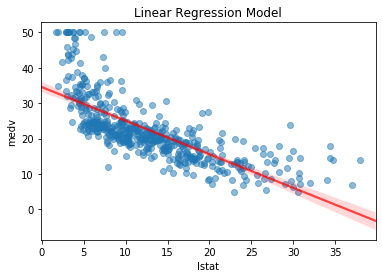

In [9]:
ax1 = sns.regplot(x= boston['lstat'], y= boston['medv'], data=boston,
            line_kws={'color':'r', 'alpha':.7},
            scatter_kws={'alpha':0.5})
ax1.set_title('Linear Regression Model')

We can see that relationship between ***medv*** and ***lstat*** may be non-linear. We'll explore tjis further through the lab exercise.

For the visual analysis, we can also plot the residuals to see their distribution.

Text(0.5, 1.0, 'Residuals')

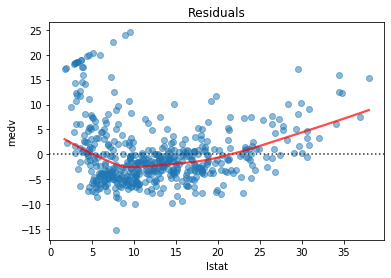

In [10]:
ax2 = sns.residplot(x= boston['lstat'], y= boston['medv'], lowess=True,
              line_kws={'color':'r', 'alpha':.7},
              scatter_kws={'alpha':0.5})
ax2.set_title('Residuals')

Now it became more evidential that we have non-linearity.

Here we can use **Leverage Statistics:**

* the y-axis has *Studentized Residuals* which are outliers that can increase *RSE* and decrease *R-squared*. General practice is that studentized residuals greater than |3| are possible outliers


* the x-axis contains possible outliers that are referred to as a *high leverage*. Points which are far from the general cluster are potential outliers

Text(0.5, 1.0, 'Leverage Points')

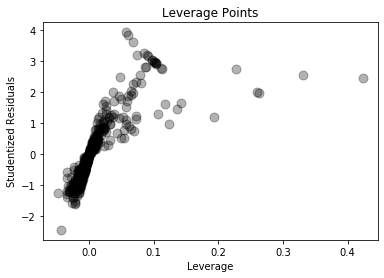

In [11]:
from statsmodels.stats.outliers_influence import OLSInfluence
st_residuals = pd.Series(lm.resid_pearson, name="Studentized Residuals") # we compute studentized residuals
leverage = pd.Series(OLSInfluence(lm).influence, name = "Leverage") # we calculate leverage stats

ax3 = sns.regplot(leverage, st_residuals, fit_reg=False,
            scatter_kws={'color':'k', 'alpha':0.3, 's':80})
ax3.set_title('Leverage Points')

Finally, we obtain the index of the highest leverage point:

In [12]:
leverage[leverage == leverage.max()].index.tolist()

[375]

---------
## _3.6.3 Multiple Linear Regression_
Now we will use all 13 variables for our regression and explore results with `.summary()` method:

In [13]:
mlm = ols('medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv',
              data=boston).fit()
mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.818e+31
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:48:20   Log-Likelihood:                 15470.
No. Observations:                 506   AIC:                        -3.091e+04
Df Residuals:                     491   BIC:                        -3.085e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.063e-14   1.46e-14     -0.726      0.468   -3.94e-14    1.81e-14
crim        5.551e-17   9.07e-17      0.612      0.541   -1.23e-16    2.34e-16
zn         -7.828e-17   3.79e-17     -2.065      0.039   -1.53e-16    -3.8e-18
indus       6.106e-16   1.68e-16      3.637      0.000    2.81e-16    9.41e-16
chas        1.776e-15   2.38e-15      0.748      0.455   -2.89e-15    6.44e-15
nox         1.199e-14   1.07e-14      1.125      0.261   -8.94e-15    3.29e-14
rm         -9.992e-16   1.23e-15     -0.810      0.418   -3.42e-15    1.42e-15
age        -4.142e-17   3.61e-17     -1.148      0.251   -1.12e-16    2.94e-17
dis        -2.595e-15   5.74e-16     -4.521      0.000   -3.72e-15   -1.47e-15
rad        -3.886e-16   1.85e-16     -2.100      0.036   -7.52e-16   -2.51e-17
tax        -3.816e-17   1.04e-17     -3.678      0.000   -5.86e-17   -1.78e-17
ptratio     9.992e-16   3.76e-16      2.658      0.008    2.61e-16    1.74e-15
black       2.906e-17   7.42e-18      3.915      0.000    1.45e-17    4.36e-17
lstat      -6.384e-16   1.53e-16     -4.179      0.000   -9.39e-16   -3.38e-16
medv           1.0000   1.23e-16   8.13e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       11.594   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.635
Skew:                           0.212   Prob(JB):                       0.0133
Kurtosis:                       2.521   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have a lot going here:
* Several variables high *p-value* and they should be evaluated individually if it worth keeping them.
* Some coefficients are close to zero, thus having minimum to none predictable power
* We may have collinearity problem

At this point, we will just concentrate to explore if there is a **collinearity** problem with this regression. **Collinearity** can pose problems because then we'll not be able to separate the true effect of the variables on outcome.

To determine if we have collinearity issue or not we will compute *Variance Inflation Factor (VIF)*

In [14]:
# Download libraries
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get y and X dataframes based on previous regression:
y, X = dmatrices('medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv',
              data=boston, return_type='dataframe')

We have matrices needed to check for the VIF and that's what we'll calculate next

In [15]:
# For each X, calculate VIF and save in dataframe
VIF = pd.DataFrame()

# VIF requieres matrix of descriptive variables and their respective indexes
VIF["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["features"] = X.columns

In [16]:
VIF.round(2)

,VIF Factor,features
0,645.98,Intercept
1,1.83,crim
2,2.35,zn
3,3.99,indus
4,1.10,chas
5,4.59,nox
6,2.26,rm
7,3.10,age
8,4.40,dis
9,7.81,rad


A value close to 0 indicates the complete absence of the collinearity. General practice is that VIF in the rage of 1-5 does not indicate collinearity, any value greater than 10 most likely tussles with collinearity issue.

Here we see that ***rad*** and ***tax*** are both over 5 and close to 10 and they can potentially increase bias in our model.

----------
## _3.6.4 Interaction Terms_
We can easily include the intercation term in our regression. For that we will include the interaction of the ***lstat*** and ***age*** by simply multipling those variables within parentheses of the method

In [17]:
# We multiple variables which interaction we want to include
lm2 = ols('medv ~ lstat * age', data=boston).fit()
lm2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           4.86e-88
Time:                        20:48:20   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--------
## _3.6.5 Non-linear Transformations of the Predictors_
In order to accomodate a non-linear transformation of the predicter we use `.from_formula()` from statsmodels and have to integrate NumPy function `.square()` within the model. This option works with statsmodel package, but there are better alternatives which will be explored in the upcoming lab works.

For the lab work we will add the ***lstat*** squared to transform the predictor:

In [18]:
lm_sqr = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', boston).fit()
print (lm_sqr.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          1.56e-112
Time:                        20:48:20   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

The near-zero *p-value* associated with the quadratic term suggests that it leads to an improved model. We use the `.anova()` (which stands for Analysis of Variance) function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [19]:
lm03 = sm.OLS.from_formula('medv ~ lstat', boston).fit()
print (sm.stats.anova_lm(lm03, lm_sqr))

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


F:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
F:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
F:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


We have performed a hypothesis test comparing the model with one predictor and transformed model with quadratic form.

* $H_{0}$: Two models fit the data equally well
* $H_{A}$: The alternative model is superior

For the result, we see that *F-test* equals 135 and the *p-value* is virtually zero. This is clear evidence that we have to reject the null hypothesis and claim that the quadratic model (lm_sqr) is far superior. This confirms our previous assumption, which was made after plotting the data, that we may have non-linearity.

We can check for the residuals we will see that for the quadratic model there is a little discernible pattern.

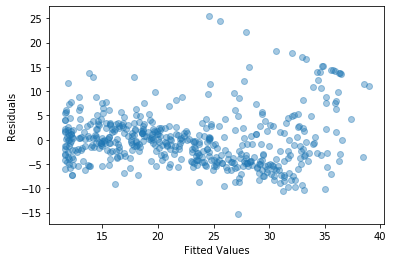

In [20]:
def plot_residuals(model):
    fitted_values = pd.Series(model.fittedvalues, name="Fitted Values")
    residuals = pd.Series(model.resid, name="Residuals")
    return sns.regplot(fitted_values, residuals,  fit_reg=False, scatter_kws={'alpha':0.4})

plot_residuals(lm_sqr)

We can also create higher-order polynomial models. For this instead of `numpy.square()` we will use `numpy.power()`. However, we will combine this by iterating within the list comprehension and using `.join()` function.

In [21]:
sm.OLS.from_formula('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,6)]), boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          8.73e-122
Time:                        20:48:20   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Findings suggest that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth-order have significant *p-values* in a regression fit.

Of course, we are not restricted to using only polynomial transformations of the predictors and we can try a log transformation.

In [22]:
sm.OLS.from_formula('medv ~ np.log(rm)', boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           1.22e-64
Time:                        20:48:20   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--------
## _3.6.6 Qualitative Predictors_
For this part we'll use the ***Carseats*** data, which is also extracted from the ITSL package and you can download it from **[here](https://drive.google.com/file/d/1trf9wd096oWyGWNfi9IBC6DMwp_uHYVw/view?usp=sharing).**

In [23]:
carseats = pd.read_csv('Carseats.csv')
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

The ***Carseats*** data includes qualitative predictors such as ***Shelveloc***, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ***Shelveloc*** takes on three possible values, *Bad, Medium,* and *Good*.

Python statsmodel will generate dummy variables automatically. So we'll fit a multiple regression model that includes some interaction terms.

In [24]:
sm.OLS.from_formula('Sales ~ Income:Advertising+Price:Age + ' + "+".join(carseats.columns.difference(['Sales'])),
                    carseats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 17 Apr 2020   Prob (F-statistic):          6.14e-166
Time:                        20:48:21   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can also manually convert categorical variables into dummy variables.

In [25]:
carseats['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [26]:
# we convert ShelveLoc column from string to categorical type
carseats['ShelveLoc'] = carseats['ShelveLoc'].astype('category')

# then assigne the encoded numerical variables
carseats['ShelveLoc_dum'] = carseats['ShelveLoc'].cat.codes
carseats['ShelveLoc_dum'].head(10)

0    0
1    1
2    2
3    2
4    0
5    0
6    2
7    1
8    2
9    2
Name: ShelveLoc_dum, dtype: int8

We use the `contrasts` library to see which returns the coding for the dummy variables and which variable will be assigned as the base.

In [27]:
from patsy.contrasts import Treatment
levels = [1, 2, 3]
contrast = Treatment(reference=0).code_without_intercept(levels)
print(contrast.matrix)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


In [28]:
dummies = pd.DataFrame(contrast.matrix[carseats.ShelveLoc_dum, :],
                      columns={'Good', 'Medium'})
dummies.head(10)

,Medium,Good
0,0.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


---------
### Summary
For the lab exercise, we started by applying simple linear regression with a single predictor. Next, we added several other variables and observed the difference and effect of adding them.

We explored interaction terms and evaluated our model for non-linearity using visual aids. We also checked for the possible outliers by using leverage statistics and studentized residuals.

Next, we ran the multiple linear regression model with all the available variables and checked the model for the potential collinearity problem. We did this by computing the Variance Inflation Factor (VIF) which showed that our model may struggle with the collinearity problem.

We continued by transforming our variables into, first, quadratic model and then up to fifth-degree polynomial. We briefly compared which degree was more rational to keep. We also did transformation by the log function.

Finally, we addressed the qualitative predictors, converted them into the dummy variables and ran the model that way. The majority of performed analysis will be performed and explored more in-depth in upcoming lab exercises.